<a href="https://colab.research.google.com/github/Div-ya18/LGMVIP-Data-Science/blob/main/Stock%20market%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

size of training data is 1221 and testing data is 814 
(1170, 50)
(763, 50)
(1170,)
(763,)


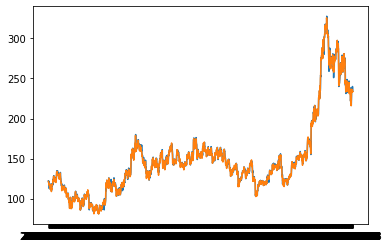

In [15]:
stock_dataset = pd.read_csv("NSE-TATAGLOBAL.csv")
stock_dataset
stock_dataset.isnull().sum()
#Let's sort the value in the acesding order of the Date to get perfect insights of data
stock_dataset.sort_values(by=["Date"], inplace=True, ascending=True)
stock_dataset.Date.head()
newdate = stock_dataset["Date"]
newdate
newopen = stock_dataset["Open"]
newdate
plt.plot(newdate,newopen)
newdate = stock_dataset["Date"]
newdate
newclose = stock_dataset["Close"]
newdate
plt.plot(newdate,newclose)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))


#Because we are going to make prediction on th basis of closing price
close_price = stock_dataset["Close"]

close_price = np.array(close_price).reshape(-1 , 1)


transformed_closed_value =  scaler.fit_transform(close_price)

df = transformed_closed_value

df.shape
training_data_length = int(0.6 * len(df))
testing_data_length  = int(len(df) - training_data_length)
training_data = df[:training_data_length]
testing_data  = df[training_data_length:]
print(f"size of training data is {len(training_data)} and testing data is {len(testing_data)} ")

1221+814
def create_dataset(dataset , n_dataset_length):
    X =[]
    Y =[]
    for i in range(len(dataset) - n_dataset_length - 1):
        X.append(dataset[i:i + n_dataset_length , 0])
        Y.append(dataset[i + n_dataset_length , 0])
    return np.array(X) , np.array(Y)

n_dataset_length = 50

X_training , Y_training = create_dataset(training_data , n_dataset_length)
X_testing , Y_testing   = create_dataset(testing_data , n_dataset_length)

print(X_training.shape) , print(X_testing.shape) , print(Y_training.shape) , print(Y_testing.shape)

#reshaping in the 3d 

X_training = X_training.reshape(X_training.shape[0] , X_training.shape[1] , 1)
X_testing  = X_testing.reshape(X_testing.shape[0] , X_testing.shape[1] , 1)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 [==============================] - 9s 176ms/step - loss: 0.0124 - val_loss: 0.0230
Epoch 2/100
19/19 [==============================] - 2s 105ms/step - loss: 0.0019

Stored 'model' (History)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
24/24 [==============================] - 1s 21ms/step


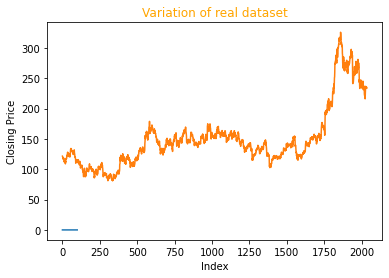

In [16]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

mdl = Sequential()

# Optionally, the first layer can receive an `input_shape` argument
mdl.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) 

#inner layer
mdl.add(LSTM(50, return_sequences=True))
mdl.add(LSTM(50))

#output layer
mdl.add(Dense(1))

mdl.compile(loss='mean_squared_error', optimizer='adam')

mdl.summary()
model = mdl.fit(X_training, Y_training, validation_data=(X_testing, Y_testing), epochs=100, batch_size=64, verbose=1);
%store model
# Ploting Loss of our trained model

loss = mdl.history.history['loss']
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Variations of Loss value with No. of Iterations", color="orange", fontsize=16, fontweight="bold");


mdl.summary()

#generation of prediction for training and testing datasets

train_preds = scaler.inverse_transform(mdl.predict(X_training))

test_preds = scaler.inverse_transform(mdl.predict(X_testing))

train_preds.shape

plt.plot(scaler.inverse_transform(df))
plt.title("Variation of real dataset")
plt.xlabel("Index")
plt.ylabel("Closing Price")

#shifting trained predictions for plotting
#putting actual and predicted in same curve
look_back = 50

#The empty_like() function is used to create a new array with the same shape and type as a given array.
trainPredictPlot = np.empty_like(df)

#nan (Empty value are assigned in the all place of trainPredictPlot)
trainPredictPlot[:,:] = np.nan


#Because predictoin started from 50th point onwards prediction (y) starts from 51th 
trainPredictPlot[look_back:len(train_preds)+look_back, :] = train_preds


#doing same for the testing data
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+(look_back*2)+1:len(df)-1, :] = test_preds

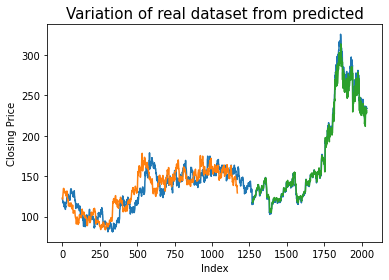

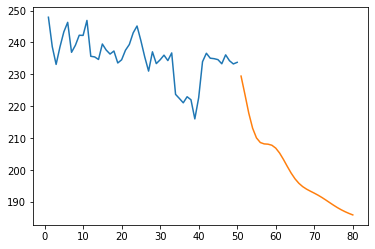

In [19]:




plt.plot(scaler.inverse_transform(df))
plt.plot(train_preds)
plt.title("Variation of real dataset from predicted",fontsize = "15")
plt.xlabel("Index")
plt.ylabel("Closing Price")
plt.plot(testPredictPlot)
plt.show()

len(X_training) , len(X_testing)

preds_input = testing_data[764:]
preds_input.shape
preds_input = preds_input.reshape(1, -1)

temp_input = list(preds_input)
len(temp_input)

temp_input = temp_input[0].tolist()

len(temp_input)


Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>50):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input)
        preds_input=preds_input.reshape(1,-1)
    


    preds_input = preds_input.reshape(1, n_dataset_length,1)
    day_output = mdl.predict(preds_input, verbose=0)
    temp_input.extend(day_output[0].tolist()) # Put in inpu i,e original
    Thirty_days_output.extend(day_output.tolist()) #Put in 30 days array

    #print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    #print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1

Thirty_days_output


new_50_days = np.arange(1,51)
predicted_30_days = np.arange(51,81)

new_50_days_output = df[1985:]
plt.plot(new_50_days, scaler.inverse_transform(new_50_days_output))
plt.plot(predicted_30_days, scaler.inverse_transform(Thirty_days_output));


new_50_days_output_list = new_50_days_output.tolist()
new_50_days_output_list.extend(Thirty_days_output)

plt.plot(scaler.inverse_transform(Latest_100_days_output_list));
